In [3]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plot
import seaborn as sea_b

In [4]:
stroke_data = pd.read_csv("stroke_dataset.csv")
print(stroke_data.shape)
print(stroke_data.dtypes)
# Our DataSet has 43400 rows and 12 features which is great!

(43400, 12)
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Data-Cleaning Step 1: Dropped Feature Column 'ID'
Feature 'id' is irrelevant to what we're trying to achieve, removing it

In [5]:
stroke_data = stroke_data.drop(['id'], axis=1)
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Data-Cleaning Step 2: Changed the value type of Feature 'Age' from a Float to an Int
Intrestingly Age is a float value which is weird, let's round and convert it to int values

In [6]:
stroke_data['age'] = stroke_data['age'].round(0).astype(int)
print(stroke_data.dtypes)

gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Data-Cleaning Step 3: Format Column Names to have a consistent formatting.
renamed column names to have lower case 'Residence_type' -> 'residence_type' , easier to deal with consistent feature name later.

In [7]:
stroke_data= stroke_data.rename(columns=str.lower)

Data-Cleaning Step 4: Strip extra whitespace from strings and convert everything to lowercase, replace internal spaces with '_'

In [8]:
def format_string(s):
    if (s):
        return str(s).replace("-","_").replace(" ","_")
    else:
        return

str_cols = stroke_data.select_dtypes(["object"])
print(str_cols.columns)
stroke_data[str_cols.columns] = str_cols.apply(lambda x: x.str.strip().str.lower().apply(format_string,True))

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


Data-Cleaning Step 5: Check for and remove any missing values and duplicates in the Dataset

In [9]:
stroke_data = stroke_data.replace('nan', npy.nan)
print(stroke_data.isnull().sum())
# Our Data has no duplicates, that's good!
stroke_data[stroke_data.duplicated(keep=False)]
# smoking_status seems to be the feature that is missing values lot of values, since it could be a
# very relevant feature and cannot be assigned dummy values, 
# as that might impact the performance of our model removing the rows with missing data seems to 
# be the likely solution
stroke_data = stroke_data.dropna(subset=['smoking_status'])
print(stroke_data.shape)
# We still have 30108 rows which is good ! BMI Still has 1462 missing values that we need to handle.

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64
(30108, 11)


EDA Step 1: Understanding the Distribution of BMI to Deal with missing values
BMI is a numerical feature where we can choose b/w mean median and mode as dummy values to fill missing information.
Data leaves a tail over the end, therefore due to the skewness I am using median to fill the missing values in BMI feature

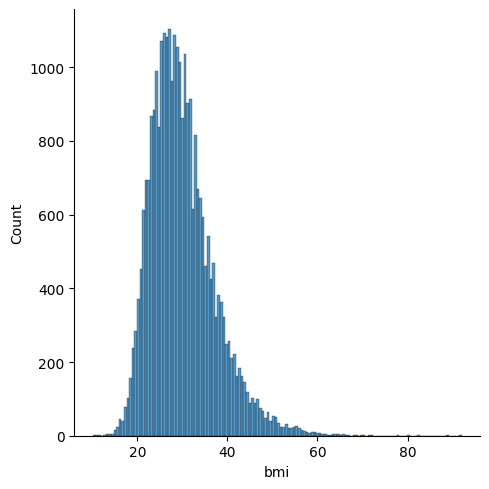

In [10]:
sea_b.displot(stroke_data['bmi'])
plot.show()
# Data-Cleaning Step 6: Based on EDA Step-1, Fill Missing values (for numerical feature) 
stroke_data = stroke_data.fillna(stroke_data['bmi'].median())

EDA Step 2: Understanding the Distribution of features whose value vary within a range and try to identify if there are outliers values for those features

C:\Users\roysu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Users\roysu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

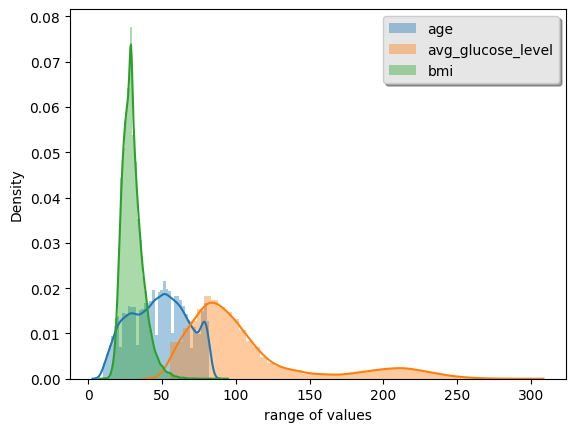

In [11]:
sea_b.distplot(stroke_data['age'], label="age")
sea_b.distplot(stroke_data['avg_glucose_level'], label="avg_glucose_level")
sea_b.distplot(stroke_data['bmi'], label="bmi")
legend = plot.legend(loc='upper right', shadow=True)
plot.xlabel("range of values")
frame = legend.get_frame()
frame.set_facecolor('0.90')
plot.show()

 We can see from the below plot that age has no tail at the end meaning there are no outliers,
 however, we can clearly observe bmi(still skewed after filling the missing values with median)
 and avg_glucose_level values leaving a tail at the end, meaning we need to take care of the outliers. 
 let's do a box plot representation for the features to get an idea on the data points that are outliers.

[Text(0.5, 1.0, 'Boxplot of Value by BMI'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Value')]

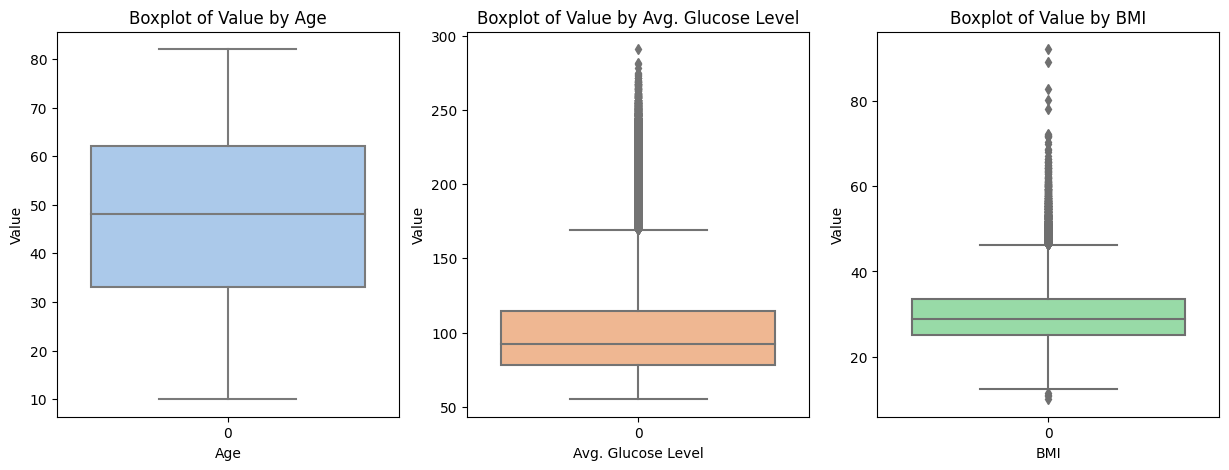

In [12]:
f,ax=plot.subplots(1,3,figsize=(15, 5))
colors = sea_b.color_palette('pastel')[0:10]
sea_b.boxplot(stroke_data['age'].values, color=colors[0], ax=ax[0])
sea_b.boxplot(stroke_data['avg_glucose_level'].values ,color=colors[1], ax=ax[1])
sea_b.boxplot(stroke_data['bmi'].values, color=colors[2], ax=ax[2])
ax[0].set(title='Boxplot of Value by Age', xlabel='Age', ylabel='Value')
ax[1].set(title='Boxplot of Value by Avg. Glucose Level', xlabel='Avg. Glucose Level', ylabel='Value')
ax[2].set(title='Boxplot of Value by BMI', xlabel='BMI', ylabel='Value')
# We can now confirm that the avg_glucose_level and bmi features have many outlier values. It's better to get rid of them before phase-II.

Data-Cleaning Step 7: Based on EDA Step 2, Handle Outliers for avg_glucose_level
According to CDC: https://www.cdc.gov/diabetes/basics/getting-tested.html Normal 
Fasting range is 99 mg/dL or below. Therefore carefully choosing the outliers to 
have some data outside range is of prime importance

C:\Users\roysu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
C:\Users\roysu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to up

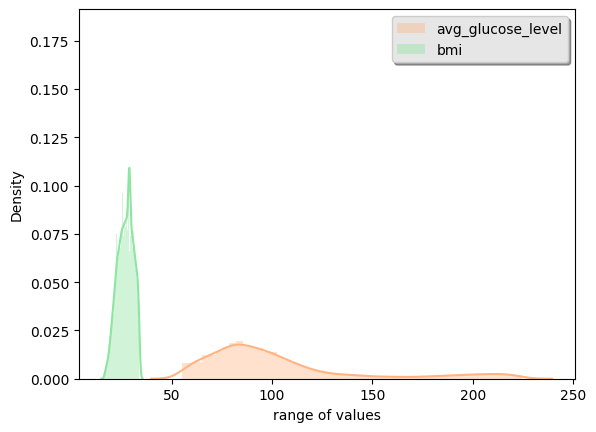

(22243, 11)


In [13]:
Q1 = stroke_data['avg_glucose_level'].quantile(0.25)
Q3 = stroke_data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3)

# For avg_glucose_level removing all values lower than 3 times IQR below  25th percentile 
# and 3 times IQR above 75th percentile.
stroke_data = stroke_data[~((stroke_data['avg_glucose_level'] < (Q1 - 0.7*IQR)) 
                            | (stroke_data['avg_glucose_level'] > (Q3 + 3 * IQR)))]
sea_b.distplot(stroke_data['avg_glucose_level'], label="avg_glucose_level", color=colors[1])
Q1 = stroke_data['bmi'].quantile(0.25)
Q3 = stroke_data['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3)
# Data-Cleaning Step 8: Handle Outliers for bmi
# According to CDC: https://www.cdc.gov/healthyweight/assessing/index.html Normal 
# BMI range is 18.5 - 24.9.Therefore, to accomodate for outliers with unrealistically 
# high/low BMI values, removing all values lower than 1 times IQR below  25th percentile and 
# 0.05 times IQR above 75th percentile

stroke_data = stroke_data[~((stroke_data['bmi'] < (Q1 - 0.8*IQR)) | (stroke_data['bmi'] > (Q3)))]
sea_b.distplot(stroke_data['bmi'], label="bmi", color=colors[2])
legend = plot.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plot.xlabel("range of values")
plot.show()
print(stroke_data.shape)
# We can see the values are now almost normally distributed

 EDA Step-3: Understanding the impact of 'age' w.r.t 'stroke'
 Questions we try to answer:
   - Is Age a detrimental factor for strokes?
   - Which age group is more susceptible to stroke ?
   - Is there any trends we see?

 Observations:
   - There's a clear Indication that the occurence of Stroke increases with age. 
   - 'Age' is a very big factor in determining the likelihood of a person to suffer from stroke in the near future.
   - Intresting Note: In our dataset ages below 20 don't suffer from stroke
   - Narrow down the leading cause of strokes in 'Adults' ? Since we cannot infer anything from the Data for age below 20 ?

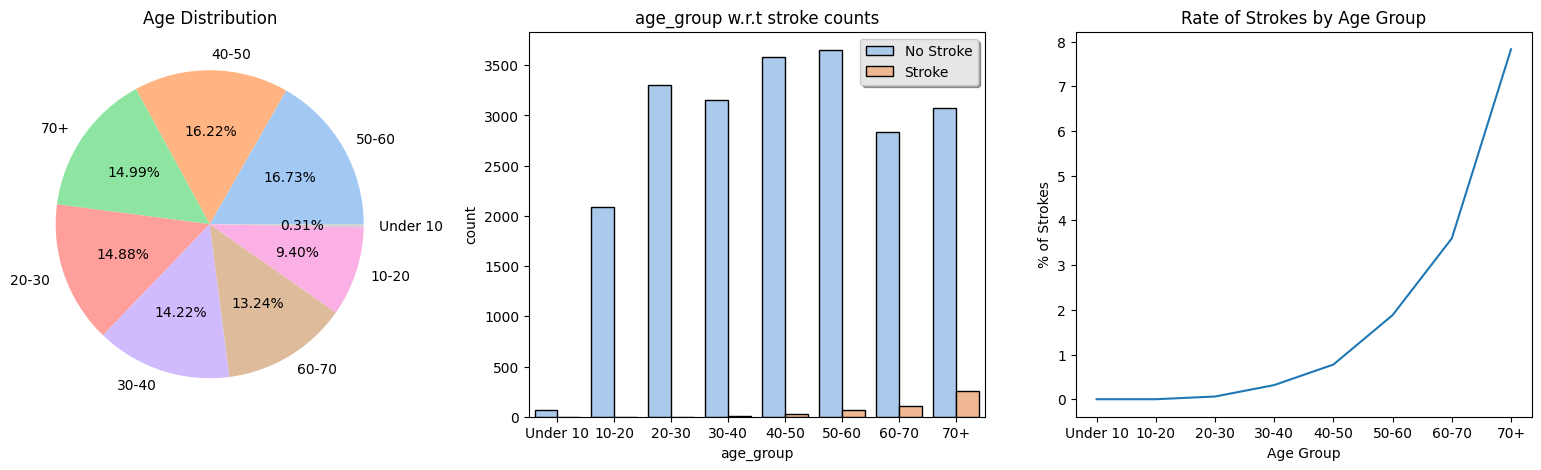

age_group
Under 10    0.000000
10-20       0.000000
20-30       0.060423
30-40       0.316156
40-50       0.776053
50-60       1.881215
60-70       3.598099
70+         7.828434
Name: stroke, dtype: float64


In [14]:
# Let's deep dive into the dataset to understand more about the features
data_frame = pd.DataFrame(stroke_data[['age', 'stroke']])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
labels = ['Under 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

data_frame['age_group'] = pd.cut(data_frame['age'], bins=bins, labels=labels)
#print(data_frame)

counts = data_frame['age_group'].value_counts()
#print(counts.values)

fig, (ax1, ax2, ax3) = plot.subplots(1, 3, figsize=(20, 5))

ax1.pie(x=counts, labels=counts.index, autopct='%2.2f%%', colors=colors)
ax1.set_title('Age Distribution')

sea_b.countplot(x="age_group", data = data_frame, hue = "stroke",palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('age_group w.r.t stroke counts')

rate = data_frame.groupby('age_group')['stroke'].mean() * 100
sea_b.lineplot(x=labels, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes by Age Group")
ax3.set_xlabel("Age Group")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)

 Data-Cleaning Step 9: Based on our prior EDA on Stroke v/s Age Feature
 Since our Target is 'Stroke' and in our dataset ages below 20 don't suffer from stroke, filtering out data data with 'age' value less than 18. 
 This would narrow our problem statement to analyse the risk of having stroke in 'Adults'. In phase 3 we can build a data product catering to Adults.

In [15]:
stroke_data = stroke_data[~(stroke_data['age'] < 18 )]
stroke_data.shape

(20994, 11)

 EDA Step-4: Understanding the impact of 'bmi' w.r.t 'stroke'
 Questions we try to answer:
   - Is BMI a detrimental factor for strokes?
   - Does categorizing BMI values into relevant categories tell a story of it's impact on strokes?
   - Which BMI group is more susceptible to stroke ?

 Observations:
   - There's isn't a very clear indication that the occurence of Stroke increases with BMI. 
   - Tried to seggregate BMI values into different categories w.r.t %age of stroke observed:
       - Underweight    1.395349
       - Healthy        1.701783
       - Overweight     2.751323
       - Obese          2.112813
   - Intresting Note: Obsese and Overweight people are slightly more susceptible to stroke
   - Question on observation:
      - What if we club the 'Underweight' , 'Overweight' and 'Obese' values into two categories 'Healthy' and 'Unhealthy' do we observe a trend ?

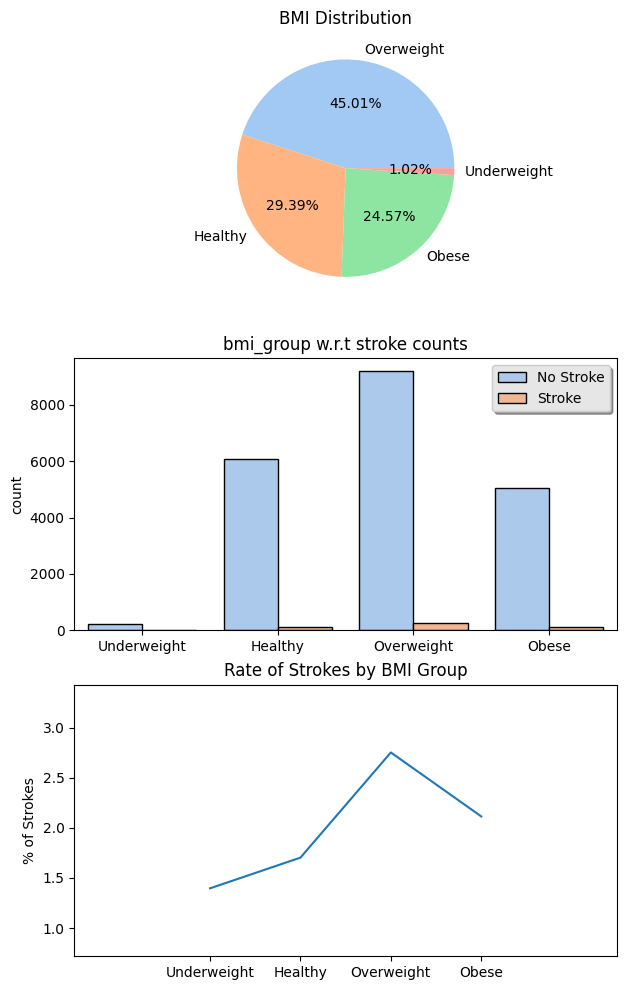

bmi_group
Underweight    1.395349
Healthy        1.701783
Overweight     2.751323
Obese          2.112813
Name: stroke, dtype: float64


In [16]:
data_frame = pd.DataFrame(stroke_data[['bmi', 'stroke']])

bins = [0, 18.5, 25, 30, 50]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

data_frame['bmi_group'] = pd.cut(data_frame['bmi'], bins=bins, labels=labels)
#print(data_frame)

counts = data_frame['bmi_group'].value_counts()
#print(counts.values)
colors = sea_b.color_palette('pastel')[0:len(counts)]

fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=counts, labels=counts.index, autopct='%2.2f%%', colors=colors)
ax1.set_title('BMI Distribution')

sea_b.countplot(x="bmi_group", data = data_frame, hue = "stroke",palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_xlabel("")
ax2.set_title('bmi_group w.r.t stroke counts')

rate = data_frame.groupby('bmi_group')['stroke'].mean() * 100
sea_b.lineplot(x=labels, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes by BMI Group")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)

 EDA Step-5: Based on Intresting note in EDA Step4 -> Understanding the impact of 'Healthy' or 'Unhealthy' BMI w.r.t 'stroke'
 <br />Data Cleaning Step 10: Categorize BMI Values to Healthy/Unhealthy -> yes/no values
 <br />
 <br />Observations:
   - %age of Strokes in Healthy BMI Group is slightly less than in Unhealthy BMI Group
   - BMI Seems like a feature that could be of use in determining the possibility of Strokes 

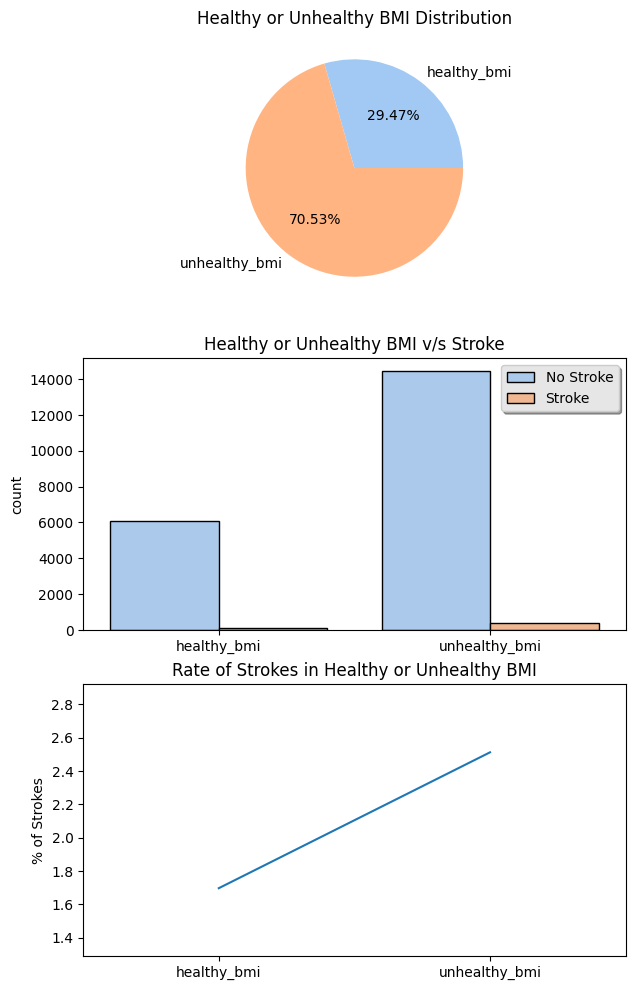

bmi
healthy_bmi      1.697381
unhealthy_bmi    2.512156
Name: stroke, dtype: float64


In [17]:
stroke_data['bmi'] = stroke_data['bmi'].apply(lambda x: 'healthy_bmi' if (x >= 18.5 and x <= 25) else 'unhealthy_bmi')
data_frame = pd.DataFrame(stroke_data[['bmi', 'stroke']])
data_frame['bmi'] = pd.Categorical(data_frame['bmi'])
fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('bmi')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['bmi'].cat.categories, colors=colors)
ax1.set_title('Healthy or Unhealthy BMI Distribution')

sea_b.countplot(x=data_frame['bmi'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Healthy or Unhealthy BMI v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('bmi')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['bmi'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes in Healthy or Unhealthy BMI")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)

 EDA Step-6: Understanding the impact of 'avg_glucose_level' w.r.t 'stroke'
 Questions we try to answer:
   - Is avg_glucose_level a detrimental factor for strokes?
   - Does categorizing avg_glucose_level values into relevant categories tell a story of it's impact on strokes?
   - Which avg_glucose_level group is more susceptible to stroke ?

</br> Observations:
   - Diabetic People have the highest risk of getting a Stroke
   - Tried to seggregate avg_glucose_level values into different categories w.r.t %age of stroke observed:
       - Low            2.033570
       - Normal         1.784002
       - Prediabetic    1.740167
       - Diabetic       2.654280
   - Normal and Pre-Diabetic Groups have the least %age of people having strokes
   - Although there's not a linear relationship but from 'Rate of Strokes by Sugar level graph' we see that rate of strokes increasing and have sort of a relationship.

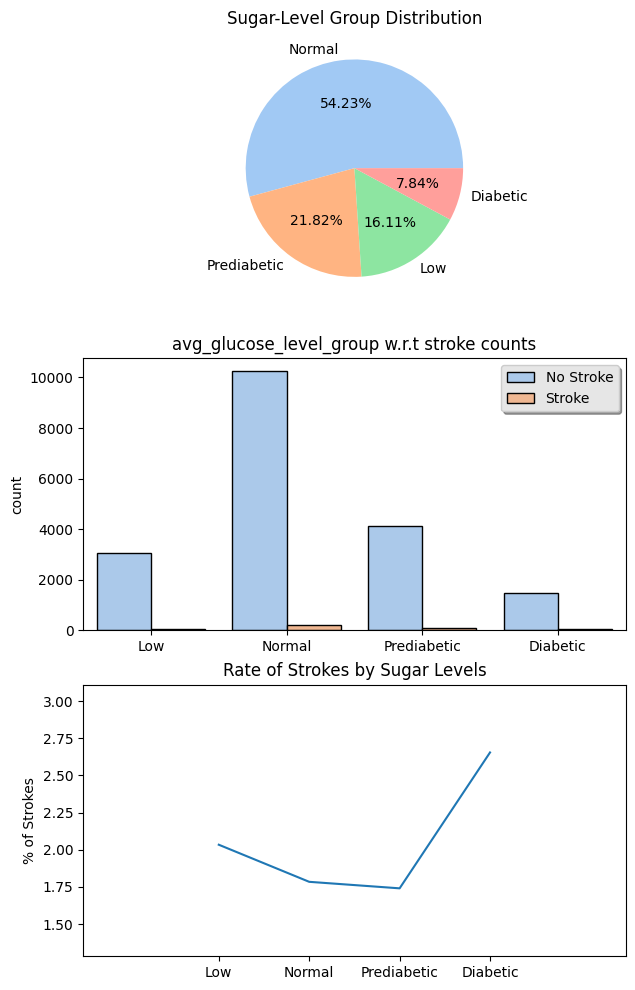

avg_glucose_level_group
Low            2.033570
Normal         1.784002
Prediabetic    1.740167
Diabetic       2.654280
Name: stroke, dtype: float64


In [18]:
data_frame = pd.DataFrame(stroke_data[['avg_glucose_level', 'stroke']])

bins = [0, 70, 100, 125, 170]
labels = ['Low', 'Normal', 'Prediabetic', 'Diabetic']

data_frame['avg_glucose_level_group'] = pd.cut(data_frame['avg_glucose_level'], bins=bins, labels=labels)
#print(data_frame)

counts = data_frame['avg_glucose_level_group'].value_counts()
#print(counts.values)
colors = sea_b.color_palette('pastel')[0:len(counts)]

fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=((7, 12)))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=counts, labels=counts.index, autopct='%2.2f%%', colors=colors)
ax1.set_title('Sugar-Level Group Distribution')

sea_b.countplot(x="avg_glucose_level_group", data = data_frame, hue = "stroke",palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_xlabel("")
ax2.set_title('avg_glucose_level_group w.r.t stroke counts')

rate = data_frame.groupby('avg_glucose_level_group')['stroke'].mean() * 100
sea_b.lineplot(x=labels, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes by Sugar Levels")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)

 EDA Step-7: Understanding the impact of 'gender' w.r.t 'stroke'
 Questions we try to answer:
   - Does stroke occur in one gender more than the other?
   - Which gender group is more susceptible to stroke ?
</br>

 Observations:
   - There doesn't seem to be a huge difference in %age of strokes observed b/w the genders.
   - Intrestingly the dataset has more female than males.
   - The relationship of genders and it's impact is unclear, maybe down the line correlation matrix would help us better ?

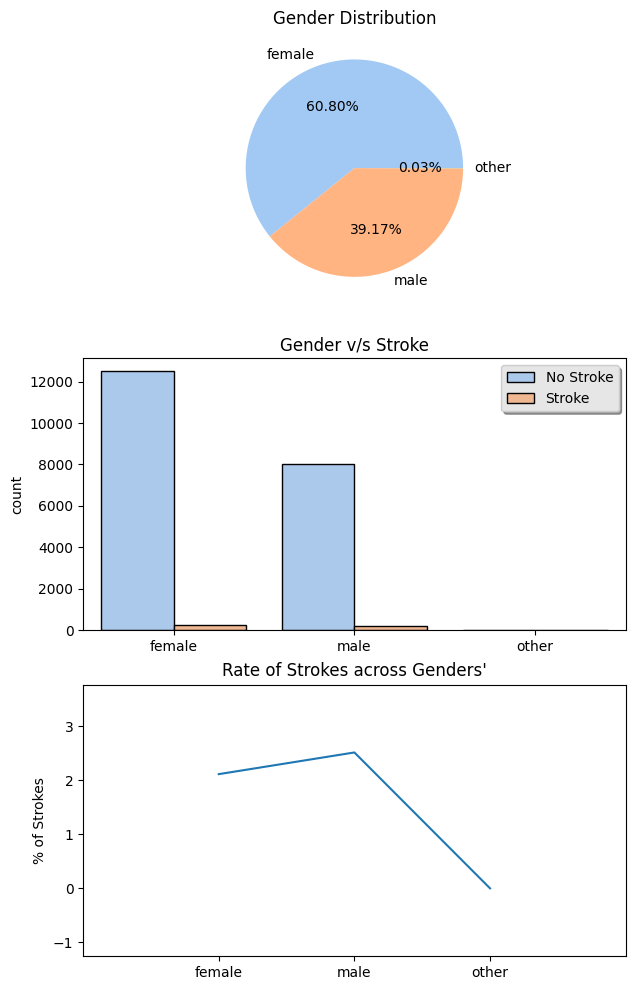

gender
female    2.115324
male      2.517023
other     0.000000
Name: stroke, dtype: float64


In [19]:
data_frame = pd.DataFrame(stroke_data[['gender', 'stroke']])
data_frame['gender'] = pd.Categorical(data_frame['gender'])
fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('gender')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['gender'].cat.categories, colors=colors)
ax1.set_title('Gender Distribution')

sea_b.countplot(x=data_frame['gender'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Gender v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('gender')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['gender'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes across Genders'")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)


 EDA Step-8: Understanding the impact of 'hypertension' w.r.t 'stroke'
 Questions we try to answer:
   - Does stroke occur in people suffering from hypertension ?
   - Are there any trends we can infer from the distribution ?
   </br>
   </br>
Observations:
   - No. of people suffering from hypertension is low.
   - The %age of people suffering from strokes is more for people who had hypertension
   - There's a clear relationship in more occurence of strokes on people who had hypertension

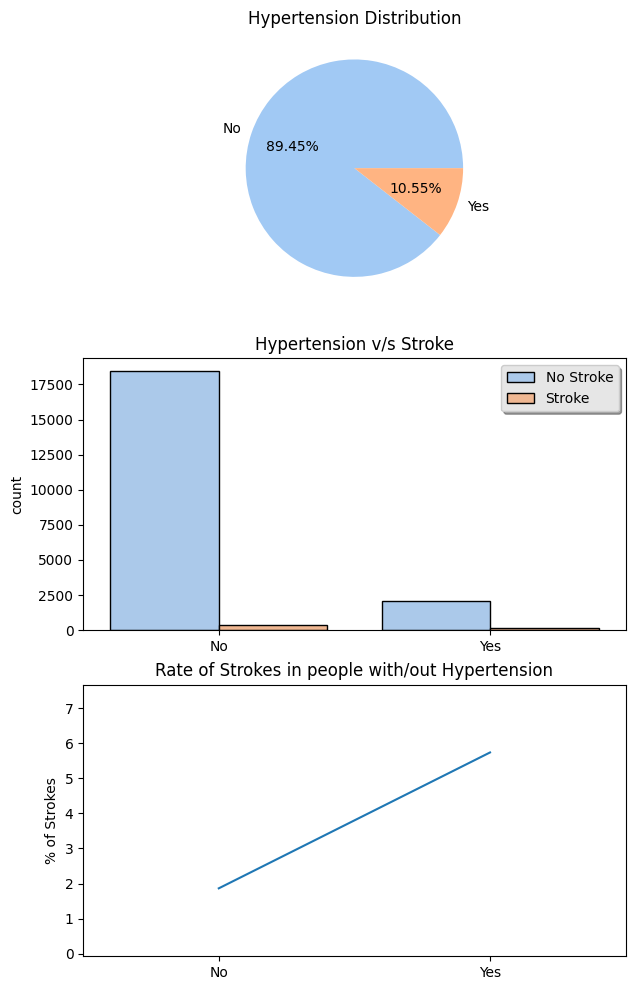

hypertension
No     1.863685
Yes    5.736224
Name: stroke, dtype: float64


In [20]:
data_frame = pd.DataFrame(stroke_data[['hypertension', 'stroke']])
data_frame['hypertension'] = data_frame['hypertension'].replace({0: 'No', 1: 'Yes'})
data_frame['hypertension'] = pd.Categorical(data_frame['hypertension'])

fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('hypertension')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['hypertension'].cat.categories, colors=colors)
ax1.set_title('Hypertension Distribution')

sea_b.countplot(x=data_frame['hypertension'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Hypertension v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('hypertension')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['hypertension'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes in people with/out Hypertension")
ax3.set_ylabel("% of Strokes")
plot.show()
print(rate)

 EDA Step-9: Understanding the impact of 'heart_disease' w.r.t 'stroke'
 Questions we try to answer:
   - Does stroke occur in people suffering from heart_disease ?
   - Are there any trends we can infer from the distribution ?
</br>
 Observations:
   - No. of people suffering from heart_disease is low.
   - The %age of people suffering from strokes is more for people who had heart_disease
   - There's a clear relationship in more occurence of strokes on people who had heart_disease

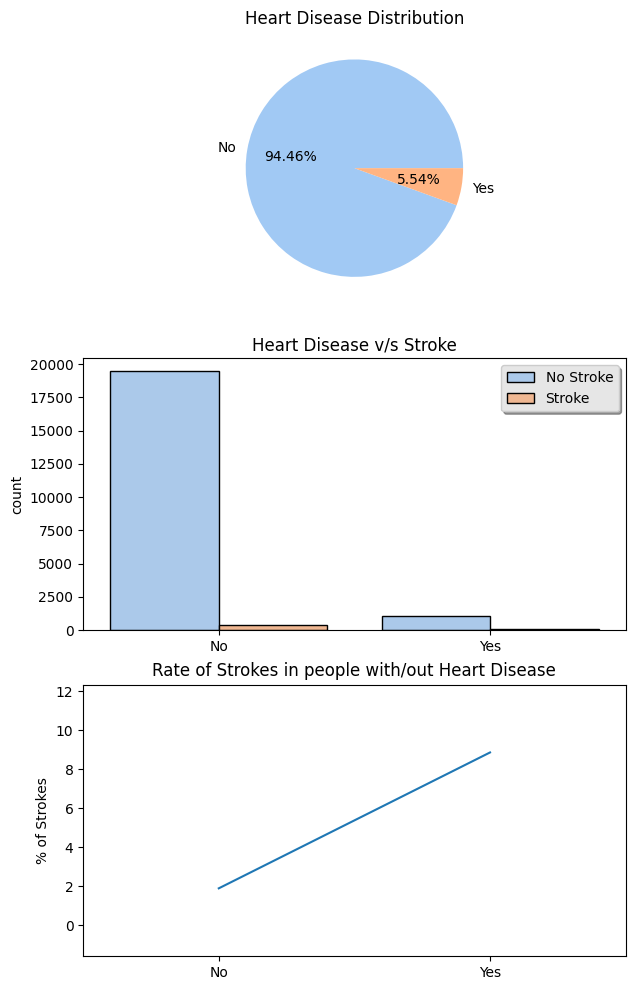

heart_disease
No     1.885936
Yes    8.856406
Name: stroke, dtype: float64


In [21]:
data_frame = pd.DataFrame(stroke_data[['heart_disease', 'stroke']])
data_frame['heart_disease'] = data_frame['heart_disease'].replace({0: 'No', 1: 'Yes'})
data_frame['heart_disease'] = pd.Categorical(data_frame['heart_disease'])

fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('heart_disease')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['heart_disease'].cat.categories, colors=colors)
ax1.set_title('Heart Disease Distribution')

sea_b.countplot(x=data_frame['heart_disease'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Heart Disease v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('heart_disease')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['heart_disease'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes in people with/out Heart Disease")
ax3.set_ylabel("% of Strokes")
plot.show()
print(rate)

 EDA Step-10: Understanding the impact of 'ever_married' w.r.t 'stroke'
 Questions we try to answer:
   - Does stroke occur in people suffering from ever_married ?
   - Are there any trends we can infer from the distribution ?
-
 Observations:
   - No. of people who are unmarried is low.
   - The %age of people suffering from strokes is more common in people who are married
   - There's a clear relationship in more occurence of strokes on people who are married

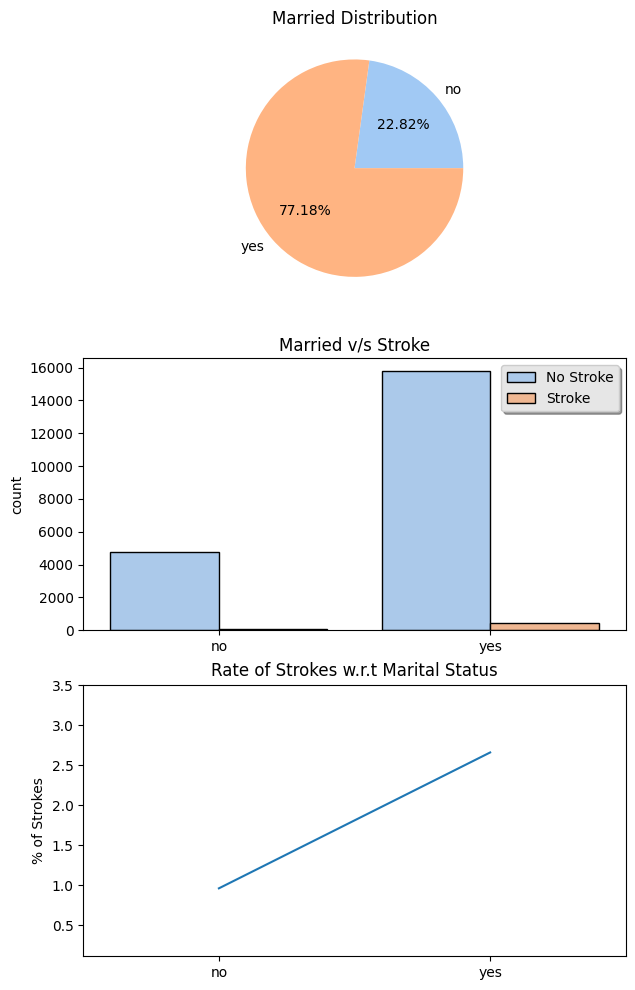

ever_married
no     0.960134
yes    2.660001
Name: stroke, dtype: float64


In [22]:
data_frame = pd.DataFrame(stroke_data[['ever_married', 'stroke']])
data_frame['ever_married'] = pd.Categorical(data_frame['ever_married'])
fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('ever_married')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['ever_married'].cat.categories, colors=colors)
ax1.set_title('Married Distribution')

sea_b.countplot(x=data_frame['ever_married'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Married v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('ever_married')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['ever_married'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes w.r.t Marital Status")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)

 EDA Step-10: Understanding the impact of 'smoking_status' w.r.t 'stroke'
 Questions we try to answer:
   - What is the distribution of data based on smoking habits of people 
   - Does stroke occur in people who were previously smokers, currently smoke or never smoked ?
   - Are there any trends we can infer from the distribution ?
-
 Observations:
   - No. of people who never_smoked and was associated with smoking is almost equal. 
   - The %age of people suffering from strokes doesn't present a clear relationship across people who formerly_smoked, currently smoke and never smoked.
   - People who formerly_smoked have the most chances of getting a stroke.
   - The chances of getting a stroke among people who never_smoked and currently smoke is almost equal
   - Intresting Note:
       - Should we club together people who have some association with smoking and follow the trend? Does it get a better representation ?

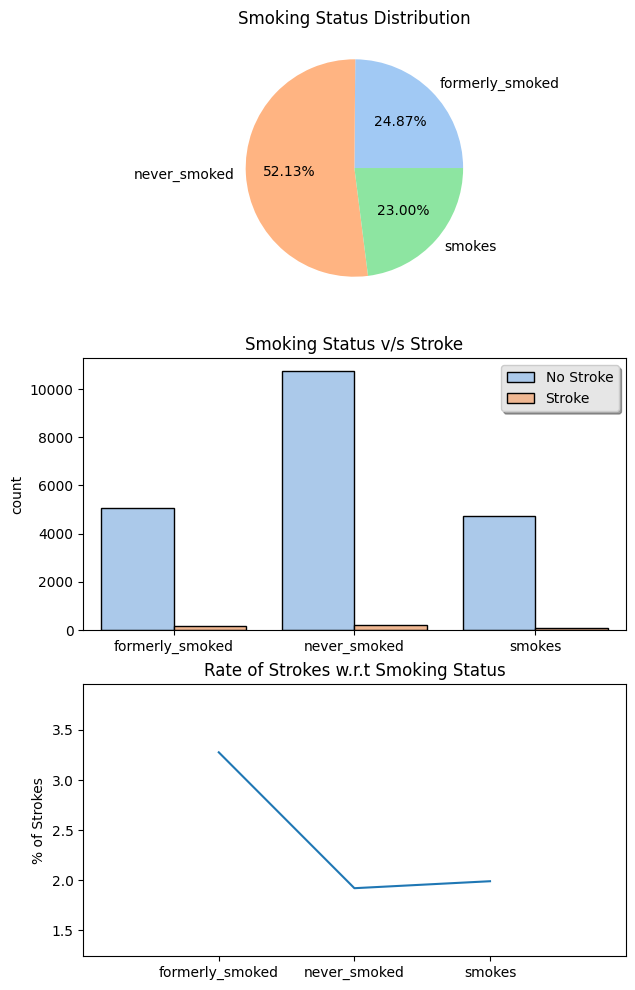

smoking_status
formerly_smoked    3.274607
never_smoked       1.918860
smokes             1.988401
Name: stroke, dtype: float64


In [23]:
data_frame = pd.DataFrame(stroke_data[['smoking_status', 'stroke']])
data_frame['smoking_status'] = pd.Categorical(data_frame['smoking_status'])
fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('smoking_status')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['smoking_status'].cat.categories, colors=colors)
ax1.set_title('Smoking Status Distribution')

sea_b.countplot(x=data_frame['smoking_status'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Smoking Status v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('smoking_status')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['smoking_status'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes w.r.t Smoking Status")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)

EDA Step 10b - Club together formerly_smoked and smokes
 - Observations:
   - smoking_status
            is_or_was_smoker    2.656716
            never_smoked        1.918860
   - People who were associated with smoking have higher chances of getting stroke.

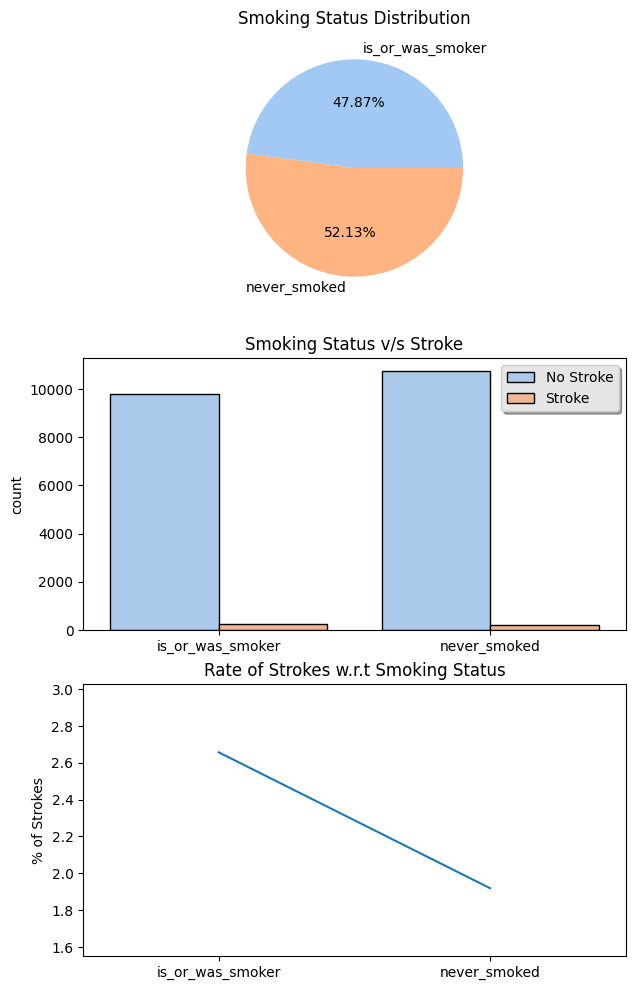

smoking_status
is_or_was_smoker    2.656716
never_smoked        1.918860
Name: stroke, dtype: float64


In [24]:
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace(['formerly_smoked', 'smokes'], 'is_or_was_smoker')
data_frame = pd.DataFrame(stroke_data[['smoking_status', 'stroke']])
data_frame['smoking_status'] = pd.Categorical(data_frame['smoking_status'])
fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('smoking_status')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['smoking_status'].cat.categories, colors=colors)
ax1.set_title('Smoking Status Distribution')

sea_b.countplot(x=data_frame['smoking_status'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Smoking Status v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('smoking_status')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['smoking_status'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes w.r.t Smoking Status")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)


 EDA Step 11: Understanding the impact of residence_type on strokes
   - Is residence_type a detrimental factor for strokes?
   - Which residence_type group is more susceptible to stroke ?
 - Observations:
   - There doesn't seem to be a huge difference in %age of strokes observed b/w the residence_type.
           - rural    2.244604
           - urban    2.29917
   - The dataset has almost equal no. of people living in rural and urban areas
   - The relationship of residence_type and it's impact is unclear, maybe down the line correlation matrix would help us better ?

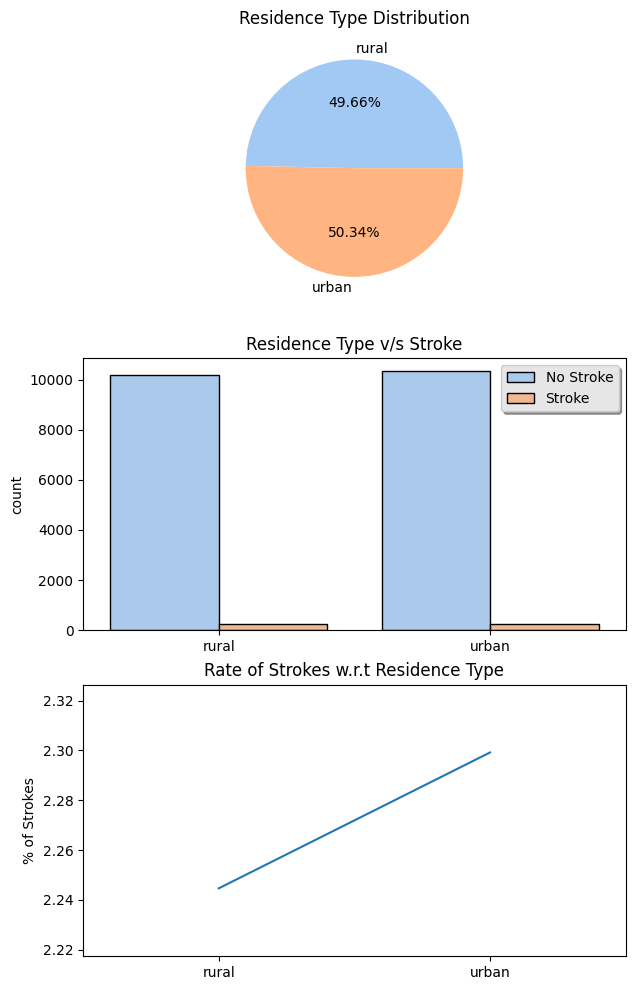

residence_type
rural    2.244604
urban    2.299177
Name: stroke, dtype: float64


In [25]:


data_frame = pd.DataFrame(stroke_data[['residence_type', 'stroke']])
data_frame['residence_type'] = pd.Categorical(data_frame['residence_type'])
fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('residence_type')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['residence_type'].cat.categories, colors=colors)
ax1.set_title('Residence Type Distribution')

sea_b.countplot(x=data_frame['residence_type'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Residence Type v/s Stroke')
ax2.set_xlabel("")
rate = data_frame.groupby('residence_type')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['residence_type'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes w.r.t Residence Type")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)


 EDA Step: Understanding the impact of work_type on strokes
   - Is work_type a detrimental factor for strokes?
   - Which work_type group is more susceptible to stroke ?
 - Observations:
   - Most people have work_type as private and the least %age are people who ahave never_worked, maybe because we filtered our data for 'Ages' > 18
   - self_employed people have the highest chances of getting a stroke, maybe the stress is a contributing factor?
           - govt_job         1.761252
           - never_worked     0.000000
           - private          1.899827
           - self_employed    3.975000

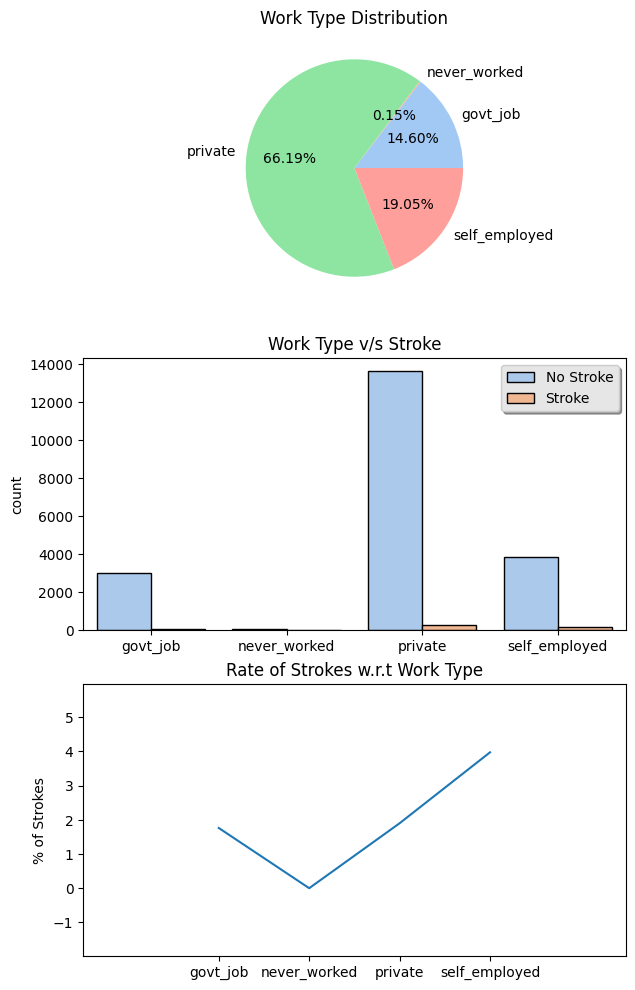

work_type
govt_job         1.761252
never_worked     0.000000
private          1.899827
self_employed    3.975000
Name: stroke, dtype: float64


In [26]:
data_frame = pd.DataFrame(stroke_data[['work_type', 'stroke']])
data_frame['work_type'] = pd.Categorical(data_frame['work_type'])
fig, (ax1, ax2, ax3) = plot.subplots(3, 1, figsize=(7, 12))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame.groupby('work_type')['stroke'].count(),data=data_frame, autopct='%2.2f%%', labels=data_frame['work_type'].cat.categories, colors=colors)
ax1.set_title('Work Type Distribution')

sea_b.countplot(x=data_frame['work_type'], data = data_frame, hue = "stroke", palette = colors, edgecolor = 'black', ax=ax2)
legend = ax2.legend(['No Stroke', 'Stroke'], loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.set_title('Work Type v/s Stroke')
ax2.set_xlabel("")

rate = data_frame.groupby('work_type')['stroke'].mean() * 100
sea_b.lineplot(x=data_frame['work_type'].cat.categories, y=rate, ax=ax3)
ax3.set_title("Rate of Strokes w.r.t Work Type")
ax3.set_ylabel("% of Strokes")

plot.show()
print(rate)

 EDA Step 13 : Let's understand the distribution of our target feature 'stroke'
 We can observe that the distribution of people who suffered from stroke is very low.
 This might be a reason as to why our correlation matrix had low values w.r.t the target
 To build a good model we would need to oversample/undersample the target feature, my hunch is leaning towards Oversampling
 as we don't lose on relevant features in our dataset, adding synthetic features to handle this particula instance seems more appropriate.

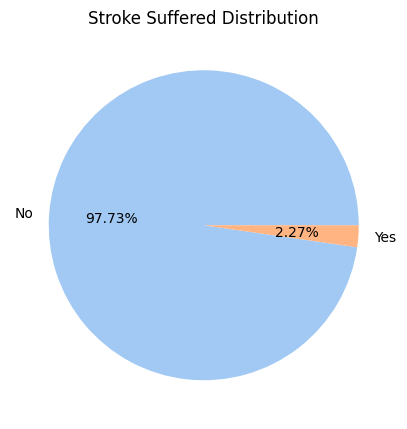

In [27]:
# EDA Step 13 : Let's understand the distribution of our target feature 'stroke'
data_frame = pd.DataFrame(stroke_data['stroke'])
data_frame['stroke'] = data_frame['stroke'].replace({0: 'No', 1: 'Yes'})
data_frame['stroke'] = pd.Categorical(data_frame['stroke'])

fig, (ax1)= plot.subplots(1, 1, figsize=(5, 10))
plot.margins(x=0.5, y=0.5)
ax1.pie(x=data_frame['stroke'].value_counts(),data=data_frame, autopct='%2.2f%%', labels=data_frame['stroke'].cat.categories, colors=colors)
ax1.set_title('Stroke Suffered Distribution')
data_frame['stroke'].value_counts()
plot.show()


# Output the Preprocessed Data to a CSV

In [28]:
stroke_data.reset_index(drop=True).to_csv("phase_1_preprocessed_data.csv")

 EDA Step 14: Let's try to see the correlation matrix w.r.t our taget 'stroke' since all the features don't have a very clear relationship
 this might help us understand them better
  We see that w.r.t the target the correlation values are fairly low for all the features
 out of all the features 'age' seems to be the one that shows highest +ve correlation with 'stroke'
 followed by heart_diseases and ....
- Observation:
       - We saw that there are some imbalanced classes in our data? Should we try to fix them by someways, this could be the reason for low correlation values.

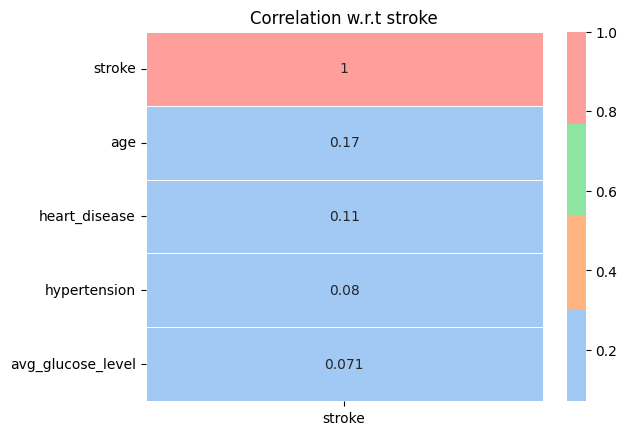

In [29]:
corr = stroke_data.corrwith(stroke_data['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sea_b.heatmap(corr,annot = True,cmap = colors,linewidths = 0.5)
plot.title('Correlation w.r.t stroke')
plot.show()

In [30]:
# Data Cleaning Step 10: # assign numerical values to features of object type
# We will use this before running any ML Algorithm
# This would also be helpful to visualise the correlation with features which were categorical initially.

stroke_data.residence_type = pd.Categorical(stroke_data.residence_type)
stroke_data['residence_type'] = stroke_data.residence_type.cat.codes
category_codes = {'never smoked': 0, 'is_or_was_smoker': 1}
stroke_data.smoking_status = pd.Categorical(stroke_data.smoking_status, categories=category_codes.keys(),ordered=True).rename_categories(category_codes)
stroke_data['smoking_status'] = stroke_data.smoking_status.cat.codes
stroke_data.ever_married = pd.Categorical(stroke_data.ever_married)
stroke_data['ever_married'] = stroke_data.ever_married.cat.codes
stroke_data.work_type = pd.Categorical(stroke_data.work_type)
stroke_data['work_type'] = stroke_data.work_type.cat.codes
stroke_data.gender = pd.Categorical(stroke_data.gender)
stroke_data['gender'] = stroke_data.gender.cat.codes
category_codes = {'healthy_bmi': 0, 'unhealthy_bmi': 1}
stroke_data.bmi =  pd.Categorical(stroke_data.bmi, categories=category_codes.keys(),ordered=True).rename_categories(category_codes)
stroke_data['bmi'] = stroke_data.bmi.cat.codes

In [31]:
# Perform Oversampling, based on previous EDA Step.
# Data Cleaning Step 11: Oversample the data frame on imbalanced classes.
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_input=stroke_data.drop(['stroke'],axis=1)
y_input=stroke_data['stroke']
x_output, y_output = oversample.fit_resample(X_input, y_input)

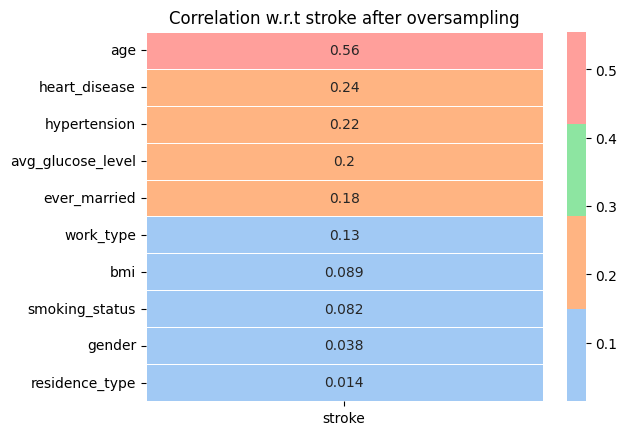

In [32]:
corr = x_output.corrwith(y_output).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sea_b.heatmap(corr,annot = True,cmap = colors,linewidths = 0.5)
plot.title('Correlation w.r.t stroke after oversampling')
plot.show()

In [33]:
# We can drop the residence_type features before using any ML Model since these feature have very low correlation with our taget 'stroke' 